In [73]:
import pandas as pd
df = pd.read_csv('Data_new_1.csv')
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
0,Gujarat,Amreli,Amreli,Black,Oil Seeds,0.3,11475,12805,12805,04 Mar 2023
1,Gujarat,Amreli,Amreli,Black,Oil Seeds,0.4,9625,13000,12500,15 Mar 2023
2,Gujarat,Amreli,Amreli,Black,Oil Seeds,0.4,10500,12000,11500,24 Mar 2023
3,Gujarat,Amreli,Amreli,Black,Oil Seeds,0.4,10500,12375,11825,21 Mar 2023
4,Gujarat,Amreli,Amreli,Black,Oil Seeds,0.5,7500,13460,12625,01 Mar 2023
...,...,...,...,...,...,...,...,...,...,...
3071,Gujarat,Amreli,Amreli,White,Oil Seeds,409.6,6250,11600,10275,13 Jun 2022
3072,Gujarat,Amreli,Amreli,White,Oil Seeds,429.0,8000,14900,13595,23 May 2023
3073,Gujarat,Amreli,Amreli,White,Oil Seeds,430.7,5000,11110,10230,14 Jun 2022
3074,Gujarat,Amreli,Amreli,White,Oil Seeds,440.0,8950,13225,12550,12 Jul 2024


In [74]:
df = df[df["Variety"]=="White"]
df

,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Reported Date
1859,Gujarat,Amreli,Amreli,White,Oil Seeds,0.2,11500,13575,13250,02 Apr 2024
1860,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,11605,12250,11750,25 Mar 2023
1861,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,13300,14250,14250,04 Mar 2023
1862,Gujarat,Amreli,Amreli,White,Oil Seeds,0.3,14405,14500,14500,06 Mar 2023
1863,Gujarat,Amreli,Amreli,White,Oil Seeds,0.4,8250,12475,11750,21 Mar 2023
...,...,...,...,...,...,...,...,...,...,...
3071,Gujarat,Amreli,Amreli,White,Oil Seeds,409.6,6250,11600,10275,13 Jun 2022
3072,Gujarat,Amreli,Amreli,White,Oil Seeds,429.0,8000,14900,13595,23 May 2023
3073,Gujarat,Amreli,Amreli,White,Oil Seeds,430.7,5000,11110,10230,14 Jun 2022
3074,Gujarat,Amreli,Amreli,White,Oil Seeds,440.0,8950,13225,12550,12 Jul 2024


In [75]:
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y').dt.date
df = df[['Reported Date', 'Arrivals (Tonnes)', 'Modal Price (Rs./Quintal)']]
df = df.sort_values(by='Reported Date', ascending=True)
df

/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_81282/1356971737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y').dt.date


,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
2842,2019-11-01,129.3,10650
2717,2019-11-02,92.6,10650
2812,2019-11-04,119.0,10690
2822,2019-11-05,121.8,10735
2838,2019-11-06,127.0,10400
...,...,...,...
2593,2024-11-15,63.5,12500
2516,2024-11-18,50.0,12450
2681,2024-11-19,82.2,12250
2580,2024-11-20,60.7,12200


In [76]:
start_date = df['Reported Date'].min()
end_date = df['Reported Date'].max()

# Generate a list of all dates between the start and end date
all_dates = pd.date_range(start=start_date, end=end_date).date

# Find missing dates by comparing with the actual dates in the dataframe
missing_dates = set(all_dates) - set(df['Reported Date'])

# Output the missing dates and their count
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")
print(f"Missing dates: {sorted(missing_dates)}")
print(f"Total missing dates: {len(missing_dates)}")

Start Date: 2019-11-01
End Date: 2024-11-21
Missing dates: [datetime.date(2019, 11, 3), datetime.date(2019, 11, 10), datetime.date(2019, 11, 17), datetime.date(2019, 11, 24), datetime.date(2019, 11, 25), datetime.date(2019, 12, 1), datetime.date(2019, 12, 5), datetime.date(2019, 12, 8), datetime.date(2019, 12, 15), datetime.date(2019, 12, 22), datetime.date(2019, 12, 29), datetime.date(2020, 1, 5), datetime.date(2020, 1, 12), datetime.date(2020, 1, 14), datetime.date(2020, 1, 19), datetime.date(2020, 1, 26), datetime.date(2020, 2, 2), datetime.date(2020, 2, 9), datetime.date(2020, 2, 16), datetime.date(2020, 2, 21), datetime.date(2020, 2, 23), datetime.date(2020, 3, 1), datetime.date(2020, 3, 8), datetime.date(2020, 3, 10), datetime.date(2020, 3, 15), datetime.date(2020, 3, 22), datetime.date(2020, 3, 23), datetime.date(2020, 3, 24), datetime.date(2020, 3, 25), datetime.date(2020, 3, 26), datetime.date(2020, 3, 27), datetime.date(2020, 3, 28), datetime.date(2020, 3, 29), datetime.date(

In [77]:
def get_missing_percentage_by_year(start_date, end_date, reported_dates):
    missing_percentage_by_year = {}

    # Generate the date range from start to end date
    all_dates = pd.date_range(start=start_date, end=end_date).date

    # Loop over each year from start_date to end_date
    current_year = start_date.year
    while current_year <= end_date.year:
        # Determine the first and last date of the current year
        year_start = pd.to_datetime(f'{current_year}-01-01').date()
        year_end = pd.to_datetime(f'{current_year}-12-31').date()

        # If the year range overlaps with the provided date range, adjust it
        if year_start < start_date:
            year_start = start_date
        if year_end > end_date:
            year_end = end_date

        # Get all dates for the current year within the range
        year_dates = pd.date_range(start=year_start, end=year_end).date

        # Get missing dates for this year
        missing_year_dates = set(year_dates) - set(reported_dates)

        # Total days in the current year range
        total_days_in_year = len(year_dates)

        # Calculate missing percentage
        missing_percentage = (len(missing_year_dates) / total_days_in_year) * 100

        # Store the result
        missing_percentage_by_year[current_year] = {
            'missing_percentage': missing_percentage,
            'total_days': total_days_in_year,
            'missing_dates': sorted(missing_year_dates)
        }

        # Move to the next year
        current_year += 1

    return missing_percentage_by_year

# Calculate missing percentage yearwise
missing_percentage_by_year = get_missing_percentage_by_year(start_date, end_date, df['Reported Date'])

# Output the missing percentage for each year, including total days and missing dates
print("\nMissing dates percentage by year:")
for year, data in missing_percentage_by_year.items():
    print(f"{year}:")
    print(f"  Total days in year: {data['total_days']}")
    print(f"  Number of Missing days: {len(data['missing_dates'])}")
    print(f"  Missing percentage: {data['missing_percentage']:.2f}%")


Missing dates percentage by year:
2019:
  Total days in year: 61
  Number of Missing days: 11
  Missing percentage: 18.03%
2020:
  Total days in year: 366
  Number of Missing days: 130
  Missing percentage: 35.52%
2021:
  Total days in year: 365
  Number of Missing days: 119
  Missing percentage: 32.60%
2022:
  Total days in year: 365
  Number of Missing days: 113
  Missing percentage: 30.96%
2023:
  Total days in year: 365
  Number of Missing days: 143
  Missing percentage: 39.18%
2024:
  Total days in year: 326
  Number of Missing days: 115
  Missing percentage: 35.28%


In [78]:
df['Arrivals (Tonnes)'] = pd.to_numeric(df['Arrivals (Tonnes)'], errors='coerce')
df['Modal Price (Rs./Quintal)'] = pd.to_numeric(df['Modal Price (Rs./Quintal)'], errors='coerce')

# Group by 'Reported Date' and aggregate (sum for arrivals, mean for price)
df = df.groupby('Reported Date').agg(
    {'Arrivals (Tonnes)': 'sum', 'Modal Price (Rs./Quintal)': 'mean'}
).reset_index()
# Forward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'].expanding().mean())
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'].expanding().mean())

# Backward Mean Imputation
df['Arrivals (Tonnes)'] = df['Arrivals (Tonnes)'].fillna(df['Arrivals (Tonnes)'][::-1].expanding().mean()[::-1])
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(df['Modal Price (Rs./Quintal)'][::-1].expanding().mean()[::-1])


In [79]:
df

,Reported Date,Arrivals (Tonnes),Modal Price (Rs./Quintal)
0,2019-11-01,129.3,10650.0
1,2019-11-02,92.6,10650.0
2,2019-11-04,119.0,10690.0
3,2019-11-05,121.8,10735.0
4,2019-11-06,127.0,10400.0
...,...,...,...
1212,2024-11-15,63.5,12500.0
1213,2024-11-18,50.0,12450.0
1214,2024-11-19,82.2,12250.0
1215,2024-11-20,60.7,12200.0


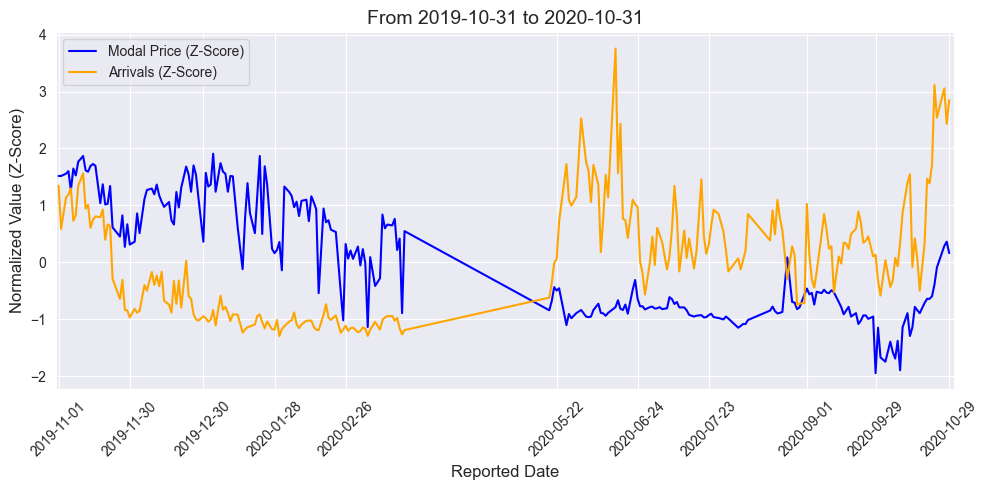

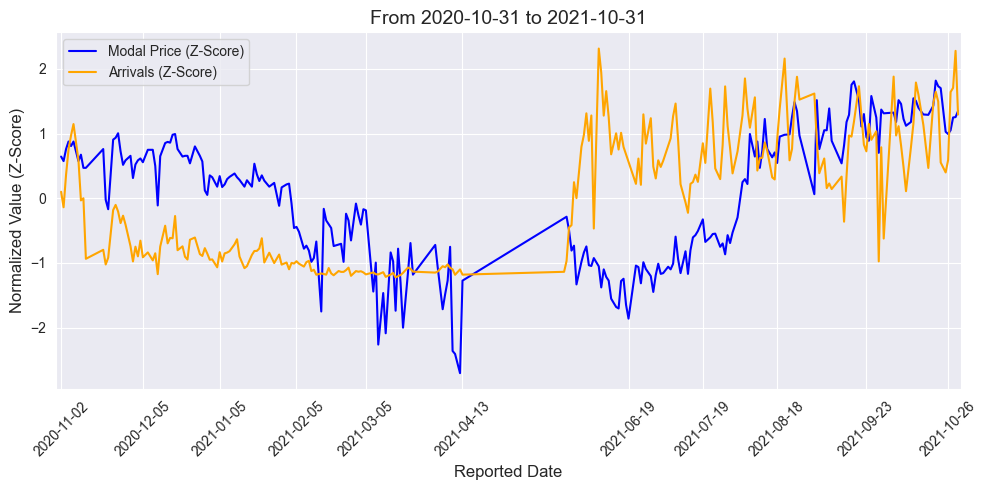

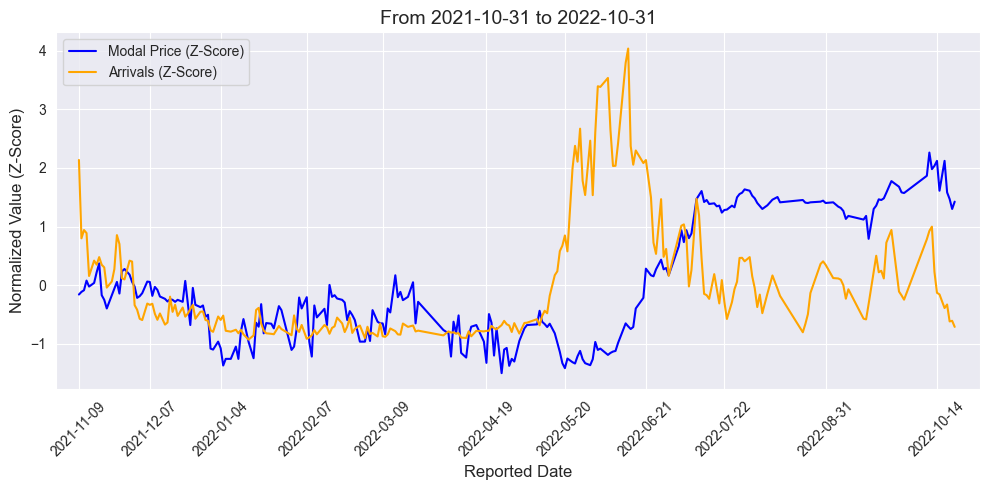

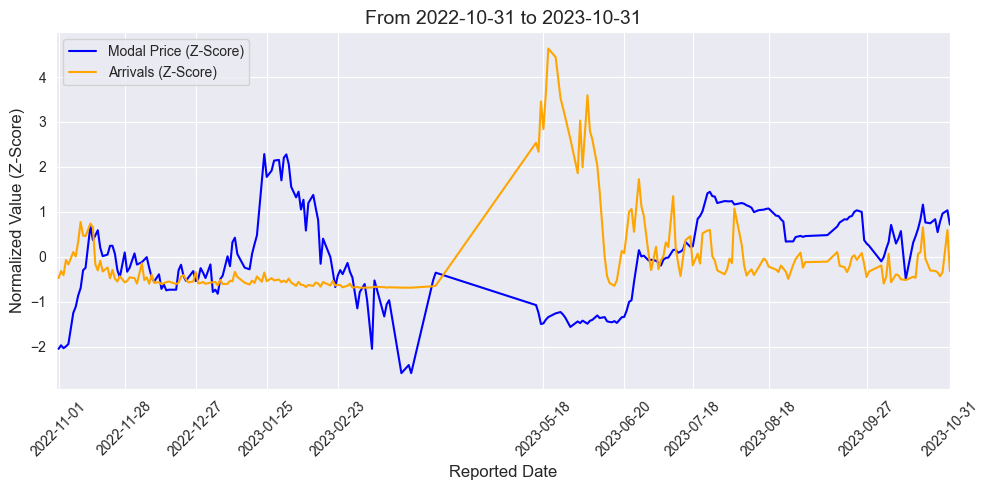

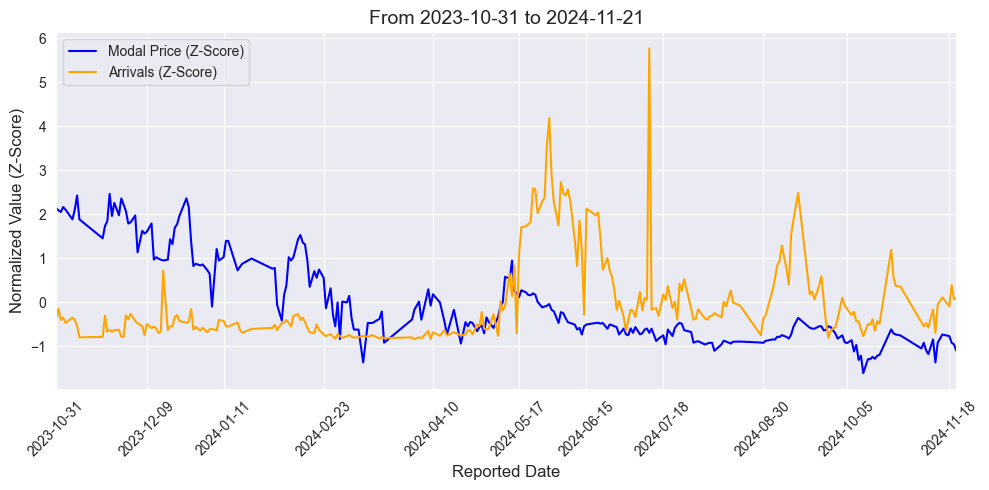

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

# Ensure the 'Reported Date' column is in datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'], format='%d %b %Y')

# Create a list of date ranges for the 5-year periods
date_ranges = [
    ('2019-10-31', '2020-10-31'),
    ('2020-10-31', '2021-10-31'),
    ('2021-10-31', '2022-10-31'),
    ('2022-10-31', '2023-10-31'),
    ('2023-10-31', '2024-11-21')
]

# Create separate DataFrames for each date range and store them in a dictionary
dfs = {}
for i, (start_date, end_date) in enumerate(date_ranges):
    dfs[f"df_{i+1}"] = df[(df['Reported Date'] >= start_date) & (df['Reported Date'] <= end_date)].copy()
    dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal) Z'] = zscore(dfs[f"df_{i+1}"]['Modal Price (Rs./Quintal)'])
    dfs[f"df_{i+1}"]['Arrivals (Tonnes) Z'] = zscore(dfs[f"df_{i+1}"]['Arrivals (Tonnes)'])

# Plot each DataFrame independently
for i, (key, filtered_df) in enumerate(dfs.items()):
    plt.figure(figsize=(10, 5))

    # Plot the normalized 'Modal Price (Rs./Quintal)' and 'Arrivals (Tonnes)'
    plt.plot(filtered_df['Reported Date'], filtered_df['Modal Price (Rs./Quintal) Z'], label='Modal Price (Z-Score)', color='blue', linestyle='-', markersize=4)
    plt.plot(filtered_df['Reported Date'], filtered_df['Arrivals (Tonnes) Z'], label='Arrivals (Z-Score)', color='orange', linestyle='-', markersize=4)

    # Set titles and labels
    plt.title(f"From {date_ranges[i][0]} to {date_ranges[i][1]}", fontsize=14)
    plt.ylabel('Normalized Value (Z-Score)', fontsize=12)
    plt.xlabel('Reported Date', fontsize=12)
    plt.legend(loc='upper left')

    # Set x-axis limits and ticks for the specific date range
    plt.xlim(pd.to_datetime(date_ranges[i][0]), pd.to_datetime(date_ranges[i][1]))
    tick_interval = max(1, len(filtered_df) // 10)
    plt.xticks(filtered_df['Reported Date'][::tick_interval], rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [81]:
df.set_index('Reported Date', inplace=True)

In [82]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with the 'Modal Price (Rs./Quintal)' column
# Ensure continuous date range
full_index = pd.date_range(df.index.min(), df.index.max(), freq='1d')
df = df.reindex(full_index)

# Fill missing values (forward fill first)
df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(method='ffill')

# Function to detect and handle outliers using IQR and impute using forward and backward fill
def handle_outliers_by_iqr(df, column):
    """Handles outliers by detecting them using IQR and imputing with forward fill and backward fill."""
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Check if there's a specific extreme value outlier (e.g., 17000) and handle it
    extreme_value = 17000  # Adjust this based on your specific scenario
    extreme_outlier = (df[column] == extreme_value)

    # You can either:
    # 1. Remove the extreme outlier
    df[column] = df[column].where(~extreme_outlier, np.nan)  # Set extreme values as NaN
    # OR
    # 2. Impute extreme outliers using the mean of forward fill and backward fill
    df[column] = df[column].where(~outliers, np.nan)  # Mark IQR outliers as NaN
    df[column] = df[column].fillna(method='ffill')  # Forward fill
    df[column] = df[column].fillna(method='bfill')  # Backward fill

    return df

# Create a sliding window of 1 month, process each month
window_size = '1M'
processed_df = pd.DataFrame()

for start_date in pd.date_range(df.index.min(), df.index.max(), freq=window_size):
    # Define end of the window (1 month later)
    end_date = start_date + pd.DateOffset(months=1)

    # Slice the dataframe for the current window (month)
    window_df = df[(df.index >= start_date) & (df.index < end_date)].copy()

    # Handle outliers in 'Modal Price (Rs./Quintal)'
    window_df = handle_outliers_by_iqr(window_df, 'Modal Price (Rs./Quintal)')

    # Concatenate the processed window to the result dataframe
    processed_df = pd.concat([processed_df, window_df])

# Ensure the final result maintains the full range of dates
processed_df = processed_df.sort_index()

# Drop 'Arrivals (Tonnes)' column
df = processed_df.drop(columns=["Arrivals (Tonnes)"], axis=1)

# Now processed_df contains the cleaned data with outliers handled and imputed


/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_81282/3000312409.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Modal Price (Rs./Quintal)'] = df['Modal Price (Rs./Quintal)'].fillna(method='ffill')
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_81282/3000312409.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for start_date in pd.date_range(df.index.min(), df.index.max(), freq=window_size):
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_81282/3000312409.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill')  # Forward fill
/var/folders/nh/b1_7lrqd3230f7mwnl4b2r3c0000gn/T/ipykernel_81282/3000312409.py:38: FutureWarning: Series.fillna with 'method' is deprecated and w

In [83]:
import pandas as pd

# Assuming `df` is already loaded with a DateTime index
target_map = df['Modal Price (Rs./Quintal)'].to_dict()

def create_forecasting_features(df):
    """
    Create time series features specifically for a 14-day forecasting task.
    """
    df = df.copy()

    # Time-based features
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    df['lag14'] = (df.index - pd.Timedelta('14 days')).map(target_map)

    # Long-term lag features
    df['lag28'] = (df.index - pd.Timedelta('28 days')).map(target_map)
    df['lag56'] = (df.index - pd.Timedelta('56 days')).map(target_map)
    df['lag_3months'] = (df.index - pd.DateOffset(months=3)).map(target_map)
    df['lag_6months'] = (df.index - pd.DateOffset(months=6)).map(target_map)

    # Rolling window features for capturing recent trends
    for window in [7, 14, 28]:  # Weekly, bi-weekly, and monthly windows
        df[f'rolling_mean_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).mean()
        df[f'rolling_std_{window}'] = df['Modal Price (Rs./Quintal)'].rolling(window=window, min_periods=1).std()

    # Exponential moving averages for smoothing recent trends
    df['ema7'] = df['Modal Price (Rs./Quintal)'].ewm(span=7, adjust=False).mean()
    df['ema14'] = df['Modal Price (Rs./Quintal)'].ewm(span=14, adjust=False).mean()

    # Recent and cumulative statistics
    df['recent_min_14'] = df['Modal Price (Rs./Quintal)'].rolling(window=14, min_periods=1).min()
    df['recent_max_14'] = df['Modal Price (Rs./Quintal)'].rolling(window=14, min_periods=1).max()
    df['recent_range_14'] = df['recent_max_14'] - df['recent_min_14']

    # Seasonal Features
    # Capture monthly or weekly seasonality
    df['monthly_avg'] = df.groupby('month')['Modal Price (Rs./Quintal)'].transform('mean')
    df['weekly_avg'] = df.groupby('weekofyear')['Modal Price (Rs./Quintal)'].transform('mean')

    # Fourier terms for periodicity (optional for strong seasonality)
    df['fourier_sin_14'] = np.sin(2 * np.pi * df.index.dayofyear / 14)
    df['fourier_cos_14'] = np.cos(2 * np.pi * df.index.dayofyear / 14)

    # Trend Feature
    df['cumulative_mean'] = df['Modal Price (Rs./Quintal)'].expanding().mean()

    return df

# Apply feature creation
df = create_forecasting_features(df)


In [84]:
df

,Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,lag56,...,ema7,ema14,recent_min_14,recent_max_14,recent_range_14,monthly_avg,weekly_avg,fourier_sin_14,fourier_cos_14,cumulative_mean
2019-11-30,9450.0,5,4,11,2019,334,48,NaN,NaN,NaN,...,9450.000000,9450.000000,9450.0,9450.0,0.0,12545.598592,12609.833333,-7.818315e-01,0.623490,9450.000000
2019-12-01,9450.0,6,4,12,2019,335,48,NaN,NaN,NaN,...,9450.000000,9450.000000,9450.0,9450.0,0.0,12054.766667,12609.833333,-4.338837e-01,0.900969,9450.000000
2019-12-02,9500.0,0,4,12,2019,336,49,NaN,NaN,NaN,...,9462.500000,9456.666667,9450.0,9500.0,50.0,12054.766667,12056.000000,-5.878305e-15,1.000000,9466.666667
2019-12-03,9995.0,1,4,12,2019,337,49,NaN,NaN,NaN,...,9595.625000,9528.444444,9450.0,9995.0,545.0,12054.766667,12056.000000,4.338837e-01,0.900969,9598.750000
2019-12-04,9650.0,2,4,12,2019,338,49,NaN,NaN,NaN,...,9609.218750,9544.651852,9450.0,9995.0,545.0,12054.766667,12056.000000,7.818315e-01,0.623490,9609.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17,12500.0,6,4,11,2024,322,46,12470.0,11880.0,12675.0,...,12343.558460,12281.373361,11650.0,12500.0,850.0,12545.598592,12782.142857,-1.273880e-14,1.000000,11494.980359
2024-11-18,12450.0,0,4,11,2024,323,47,12470.0,11880.0,12750.0,...,12370.168845,12303.856913,11650.0,12500.0,850.0,12545.598592,12732.031250,4.338837e-01,0.900969,11495.515984
2024-11-19,12250.0,1,4,11,2024,324,47,12470.0,11880.0,12750.0,...,12340.126634,12296.675991,11650.0,12500.0,850.0,12545.598592,12732.031250,7.818315e-01,0.623490,11495.938901
2024-11-20,12200.0,2,4,11,2024,325,47,12075.0,11880.0,12625.0,...,12305.094975,12283.785859,11650.0,12500.0,850.0,12545.598592,12732.031250,9.749279e-01,0.222521,11496.333333


In [85]:
df

,Modal Price (Rs./Quintal),dayofweek,quarter,month,year,dayofyear,weekofyear,lag14,lag28,lag56,...,ema7,ema14,recent_min_14,recent_max_14,recent_range_14,monthly_avg,weekly_avg,fourier_sin_14,fourier_cos_14,cumulative_mean
2019-11-30,9450.0,5,4,11,2019,334,48,NaN,NaN,NaN,...,9450.000000,9450.000000,9450.0,9450.0,0.0,12545.598592,12609.833333,-7.818315e-01,0.623490,9450.000000
2019-12-01,9450.0,6,4,12,2019,335,48,NaN,NaN,NaN,...,9450.000000,9450.000000,9450.0,9450.0,0.0,12054.766667,12609.833333,-4.338837e-01,0.900969,9450.000000
2019-12-02,9500.0,0,4,12,2019,336,49,NaN,NaN,NaN,...,9462.500000,9456.666667,9450.0,9500.0,50.0,12054.766667,12056.000000,-5.878305e-15,1.000000,9466.666667
2019-12-03,9995.0,1,4,12,2019,337,49,NaN,NaN,NaN,...,9595.625000,9528.444444,9450.0,9995.0,545.0,12054.766667,12056.000000,4.338837e-01,0.900969,9598.750000
2019-12-04,9650.0,2,4,12,2019,338,49,NaN,NaN,NaN,...,9609.218750,9544.651852,9450.0,9995.0,545.0,12054.766667,12056.000000,7.818315e-01,0.623490,9609.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17,12500.0,6,4,11,2024,322,46,12470.0,11880.0,12675.0,...,12343.558460,12281.373361,11650.0,12500.0,850.0,12545.598592,12782.142857,-1.273880e-14,1.000000,11494.980359
2024-11-18,12450.0,0,4,11,2024,323,47,12470.0,11880.0,12750.0,...,12370.168845,12303.856913,11650.0,12500.0,850.0,12545.598592,12732.031250,4.338837e-01,0.900969,11495.515984
2024-11-19,12250.0,1,4,11,2024,324,47,12470.0,11880.0,12750.0,...,12340.126634,12296.675991,11650.0,12500.0,850.0,12545.598592,12732.031250,7.818315e-01,0.623490,11495.938901
2024-11-20,12200.0,2,4,11,2024,325,47,12075.0,11880.0,12625.0,...,12305.094975,12283.785859,11650.0,12500.0,850.0,12545.598592,12732.031250,9.749279e-01,0.222521,11496.333333


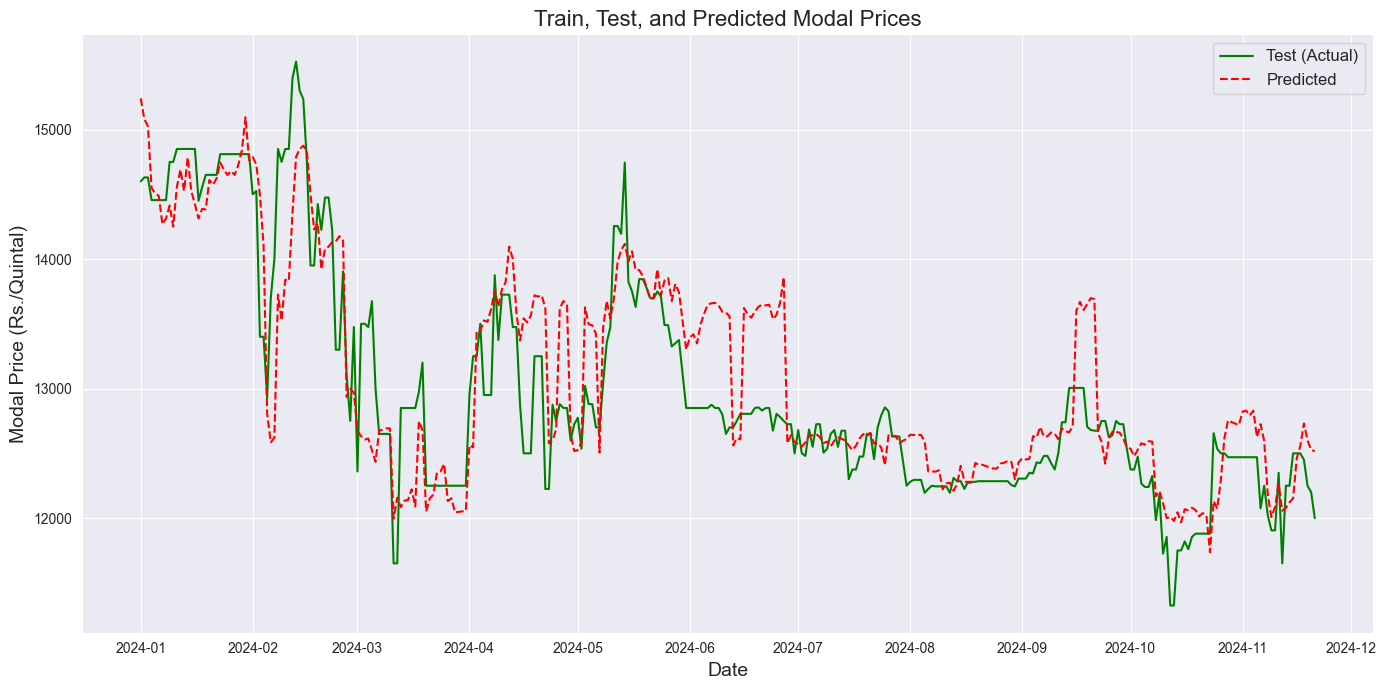

Metrics:
Mean Absolute Error (MAE): 333.8046
Symmetric Mean Absolute Percentage Error (SMAPE): 2.5394
Median Absolute Percentage Error (MDAPE): 1.8202
Geometric Mean Relative Absolute Error (GMRAE): 0.4111


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-21']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))


# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Train, Test, and Predicted Modal Prices", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [87]:
import pandas as pd
import numpy as np
from itertools import product
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Assuming X_train, y_train, X_test, and y_test are defined
# Define the hyperparameter grid with additional values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Added 0.3
    'max_depth': [3, 5, 7, 9],  # Added 9
    'n_estimators': [50, 100, 150, 200],  # Added 200
    'booster': ['gbtree', 'dart'],  # Added 'gblinear'
}

# Generate all combinations of hyperparameters
param_combinations = list(product(
    param_grid['learning_rate'],
    param_grid['max_depth'],
    param_grid['n_estimators'],
    param_grid['booster']
))

# Store results for comparison
results = []

# Iterate through each parameter combination
for params in param_combinations:
    # Unpack parameters
    learning_rate, max_depth, n_estimators, booster = params

    # If booster is 'gblinear', max_depth should not be passed
    if booster == 'gblinear':
        model = XGBRegressor(
            objective='reg:squarederror',
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            booster=booster,
            random_state=42
        )
    else:
        model = XGBRegressor(
            objective='reg:squarederror',
            learning_rate=learning_rate,
            max_depth=max_depth,
            n_estimators=n_estimators,
            booster=booster,
            random_state=42
        )

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Evaluate performance using MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Save the results
    results.append({
        'learning_rate': learning_rate,
        'max_depth': max_depth if booster != 'gblinear' else None,  # Show None if gblinear
        'n_estimators': n_estimators,
        'booster': booster,
        'mae': mae
    })

    print(f"Evaluated params: {params} | MAE: {mae:.4f}")

# Convert results to a DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Find the best parameters (lowest MAE)
best_params = results_df.loc[results_df['mae'].idxmin()]

# Print the best parameters and corresponding score
print("\nBest Parameters:")
print(best_params)

# Train the final model with the best parameters
if best_params['booster'] == 'gblinear':
    final_model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),
        booster=best_params['booster'],
        random_state=42
    )
else:
    final_model = XGBRegressor(
        objective='reg:squarederror',
        learning_rate=best_params['learning_rate'],
        max_depth=int(best_params['max_depth']),
        n_estimators=int(best_params['n_estimators']),
        booster=best_params['booster'],
        random_state=42
    )

final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)

# Calculate metrics for the final model
final_mae = mean_absolute_error(y_test, y_pred_final)
print(f"\nFinal Model MAE: {final_mae:.4f}")

# Output the final predictions for visualization or further analysis
print("\nFinal Predictions:")
print(pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_final}, index=y_test.index))


Evaluated params: (0.01, 3, 50, 'gbtree') | MAE: 1077.0564
Evaluated params: (0.01, 3, 50, 'dart') | MAE: 1077.0564
Evaluated params: (0.01, 3, 100, 'gbtree') | MAE: 619.8790
Evaluated params: (0.01, 3, 100, 'dart') | MAE: 619.8790
Evaluated params: (0.01, 3, 150, 'gbtree') | MAE: 416.7451
Evaluated params: (0.01, 3, 150, 'dart') | MAE: 416.7451
Evaluated params: (0.01, 3, 200, 'gbtree') | MAE: 330.7359
Evaluated params: (0.01, 3, 200, 'dart') | MAE: 330.7359
Evaluated params: (0.01, 5, 50, 'gbtree') | MAE: 1085.6825
Evaluated params: (0.01, 5, 50, 'dart') | MAE: 1085.6826
Evaluated params: (0.01, 5, 100, 'gbtree') | MAE: 667.4266
Evaluated params: (0.01, 5, 100, 'dart') | MAE: 667.4267
Evaluated params: (0.01, 5, 150, 'gbtree') | MAE: 464.3915
Evaluated params: (0.01, 5, 150, 'dart') | MAE: 464.3915
Evaluated params: (0.01, 5, 200, 'gbtree') | MAE: 385.3746
Evaluated params: (0.01, 5, 200, 'dart') | MAE: 385.3747
Evaluated params: (0.01, 7, 50, 'gbtree') | MAE: 1089.5618
Evaluated par

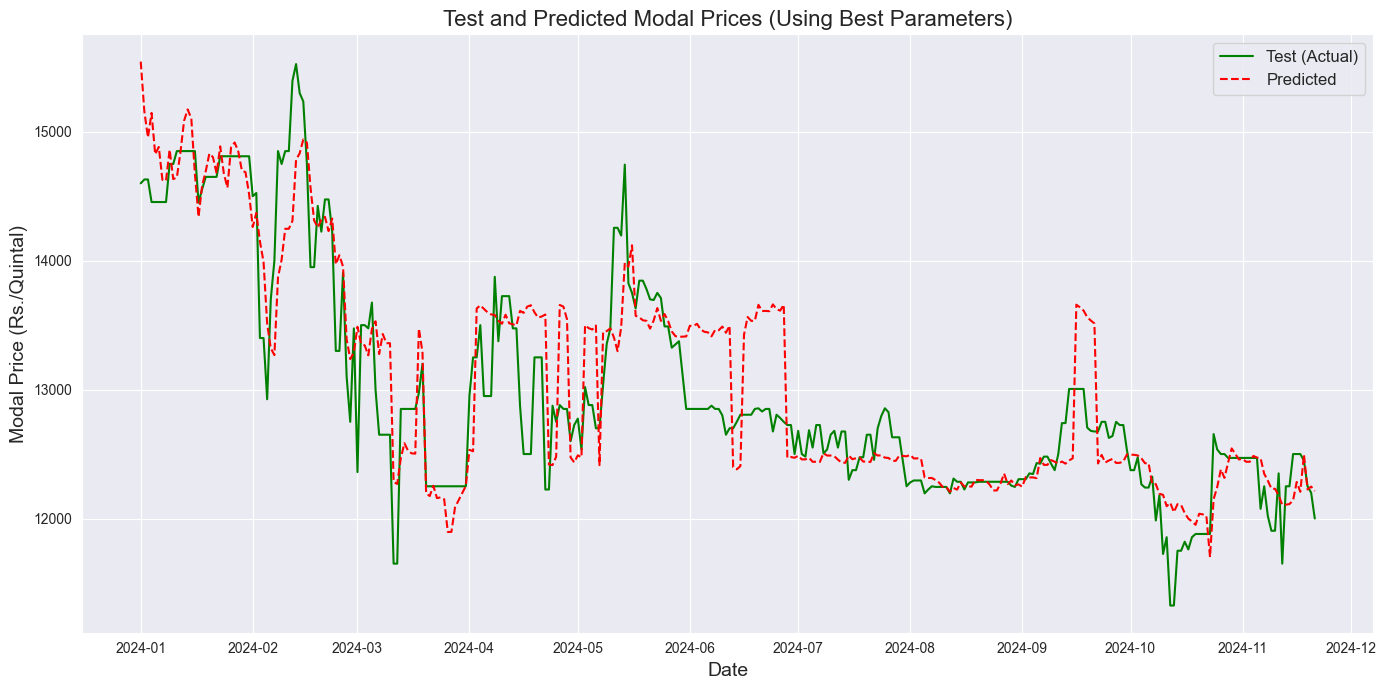

Metrics:
Mean Absolute Error (MAE): 309.4545
Symmetric Mean Absolute Percentage Error (SMAPE): 2.3507
Median Absolute Percentage Error (MDAPE): 1.6496
Geometric Mean Relative Absolute Error (GMRAE): 0.3391


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

# Function to impute outliers using IQR with mean of previous and next values
def impute_outliers_with_iqr(df, column):
    """Impute outliers with the mean of the previous and next values using IQR"""
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Replace outliers with the mean of the previous and next values (forward and backward fill)
    for i in range(1, len(df) - 1):
        if outliers.iloc[i]:
            prev_value = df[column].iloc[i-1]  # Previous value
            next_value = df[column].iloc[i+1]  # Next value
            # Replace outlier with the average of previous and next values
            df[column].iloc[i] = (prev_value + next_value) / 2

    return df

# Assuming `df` contains your data, and it is already prepared with features and target column
# Define train and test data
train_data = df.loc[:'2023-12-31']
test_data = df.loc['2024-01-01':'2024-11-21']

# Extract features and target
feature_columns = [col for col in df.columns if col != 'Modal Price (Rs./Quintal)']
X_train = train_data[feature_columns]
y_train = train_data['Modal Price (Rs./Quintal)']
X_test = test_data[feature_columns]
y_test = test_data['Modal Price (Rs./Quintal)']

# Impute outliers in the 'Modal Price (Rs./Quintal)' column using IQR method
df = impute_outliers_with_iqr(df, 'Modal Price (Rs./Quintal)')

# Best parameters
best_params = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'n_estimators': 150,
    'booster': 'gbtree'
}

# Initialize the model with the best parameters
model = XGBRegressor(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    booster=best_params['booster']
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Add predictions to test data
test_data = test_data.copy()  # Avoid SettingWithCopyWarning
test_data['Predicted'] = y_pred

# Plot
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data.index, test_data['Modal Price (Rs./Quintal)'], label='Test (Actual)', color='green')

# Plot predictions
plt.plot(test_data.index, test_data['Predicted'], label='Predicted', color='red', linestyle='--')

# Add title and labels
plt.title("Test and Predicted Modal Prices (Using Best Parameters)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

# Metrics Calculation
def smape(y_true, y_pred):
    """Symmetric Mean Absolute Percentage Error"""
    non_zero_mask = (np.abs(y_true) + np.abs(y_pred)) > 0  # Avoid division by zero
    return 100 * np.mean(2 * np.abs(y_pred[non_zero_mask] - y_true[non_zero_mask]) /
                         (np.abs(y_true[non_zero_mask]) + np.abs(y_pred[non_zero_mask])))

def mdape(y_true, y_pred):
    """Median Absolute Percentage Error"""
    non_zero_mask = y_true != 0  # Avoid division by zero
    return 100 * np.median(np.abs((y_pred[non_zero_mask] - y_true[non_zero_mask]) / y_true[non_zero_mask]))

def gmrae(y_true, y_pred):
    """Geometric Mean Relative Absolute Error"""
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true - np.mean(y_true))
    ratio = numerator / (denominator + 1e-10)  # Avoid division by zero
    return np.exp(np.mean(np.log(ratio + 1e-10)))

mae = mean_absolute_error(y_test, y_pred)
smape_val = smape(y_test.values, y_pred)
mdape_val = mdape(y_test.values, y_pred)
gmrae_val = gmrae(y_test.values, y_pred)

# Print metrics
print("Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Symmetric Mean Absolute Percentage Error (SMAPE): {smape_val:.4f}")
print(f"Median Absolute Percentage Error (MDAPE): {mdape_val:.4f}")
print(f"Geometric Mean Relative Absolute Error (GMRAE): {gmrae_val:.4f}")


In [101]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error  # Import the necessary function
df = create_forecasting_features(df)
df_vis = df.copy()
df = df.iloc[df.index<'2024-11-22']
TARGET = 'Modal Price (Rs./Quintal)'
X_all = df.drop(columns=[TARGET])
y_all = df[TARGET]
reg = xgb.XGBRegressor(**best_params)

reg.fit(X_all, y_all, eval_set=[(X_all, y_all), (X_all, y_all)],verbose=100)

[0]	validation_0-rmse:2242.06522	validation_1-rmse:2242.06522
[100]	validation_0-rmse:142.40516	validation_1-rmse:142.40516
[149]	validation_0-rmse:118.37086	validation_1-rmse:118.37086


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [102]:
#Create future dataframe
future = pd.date_range('2024-11-21', '2024-12-04', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df['isFuture'] = False
df_and_future = pd.concat([df, future_df])
df_and_future = create_forecasting_features(df_and_future)

In [103]:
future_w_features = df_and_future.query('isFuture').copy()

In [104]:
future_w_features2 = future_w_features.drop(columns=['Modal Price (Rs./Quintal)'], axis=1)
future_w_features['pred'] = reg.predict(future_w_features2)

<Axes: title={'center': 'Future Predictions'}>

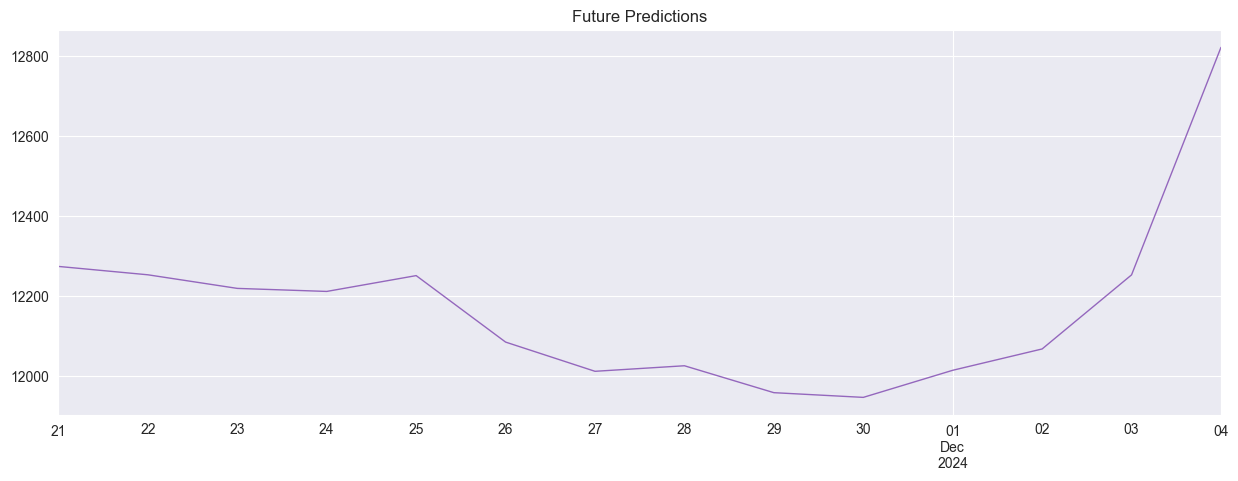

In [105]:
import seaborn as sns

color_pal = sns.color_palette()
future_w_features['pred'].plot(figsize=(15, 5), color=color_pal[4], ms=1, lw=1, title='Future Predictions')

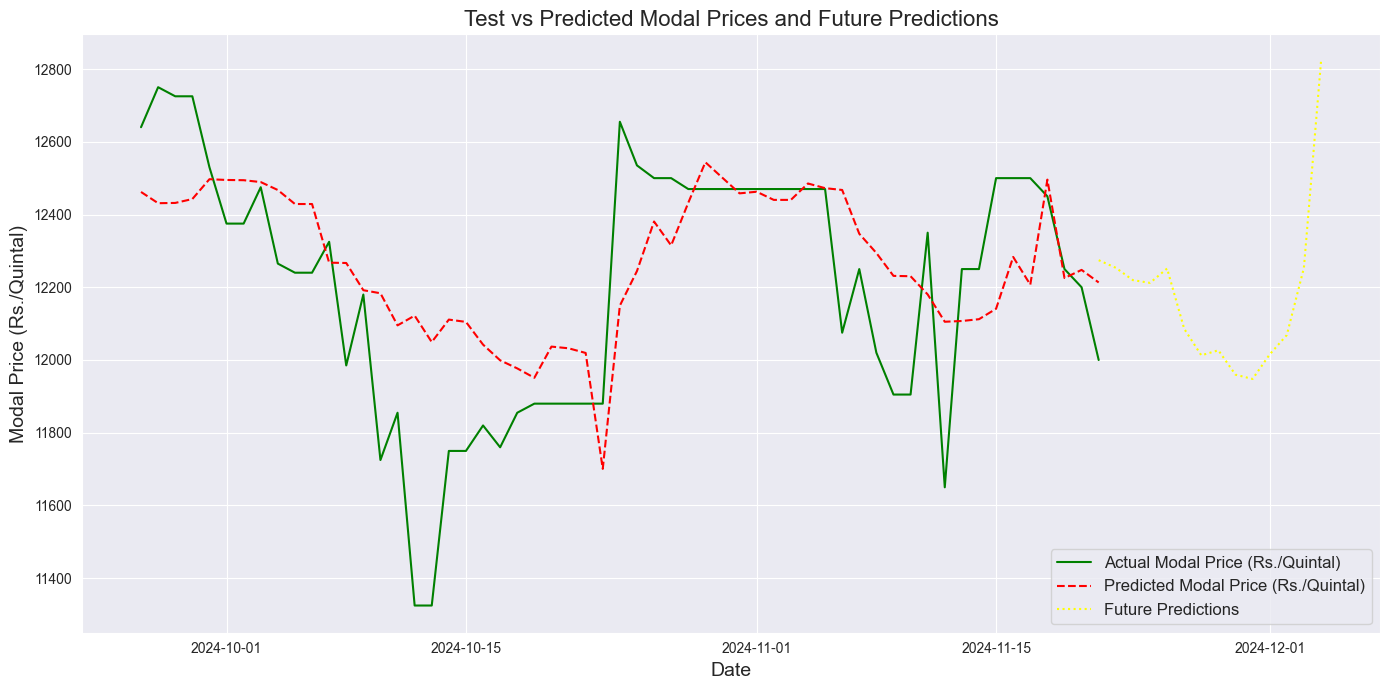

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust date range for 8 weeks (~56 days) past data
test_data_filtered = test_data.loc['2024-09-26':'2024-11-21']

# Plotting
plt.figure(figsize=(14, 7))

# Plot test data (actual values)
plt.plot(test_data_filtered.index, test_data_filtered['Modal Price (Rs./Quintal)'],
         label='Actual Modal Price (Rs./Quintal)', color='green')

# Plot predicted values
plt.plot(test_data_filtered.index, test_data_filtered['Predicted'],
         label='Predicted Modal Price (Rs./Quintal)', color='red', linestyle='--')

# Plot future predictions (from future_w_features)
plt.plot(future_w_features.index, future_w_features['pred'],
         label='Future Predictions', color='yellow', linestyle=':')

# Add title and labels
plt.title("Test vs Predicted Modal Prices and Future Predictions", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Modal Price (Rs./Quintal)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
